## 👉 With Python, you can make requests to an API or scrape a webpage to extract useful information!

# 1️⃣ A small meteo app 🌤️

In [1]:
import requests

In [2]:
def get_coords(city):
    url = f"https://weather.lewagon.com/geo/1.0/direct?q={city}&limit=1"
    response = requests.get(url)
    json_object = response.json()
    latitude = json_object[0]['lat']
    longitude = json_object[0]['lon']
    return latitude, longitude

In [3]:
get_coords("Genève")

(46.2017559, 6.1466014)

In [4]:
def get_weather(lat, lon):
    url = f"https://weather.lewagon.com/data/2.5/weather?lat={lat}&lon={lon}"
    response = requests.get(url)
    json_object = response.json()
    weather = json_object['weather'][0]['description']
    return weather

In [5]:
get_weather(52.45, 0.2)

'few clouds'

In [6]:
def main():
    city = input("""
City?
> """)
    latitude, longitude = get_coords(city)
    weather = get_weather(latitude, longitude)
    print(f"""
The weather in {city} is {weather}!""")

In [7]:
main()

KeyError: 0

# 2️⃣ Scrape a webpage to get data 📈
https://companiesmarketcap.com/largest-companies-by-revenue/

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [67]:
def get_data_from_page(i):
    # 1. use interpolation to build the relevant URL
    url = f"https://companiesmarketcap.com/largest-companies-by-revenue/page/{i}/"
    
    # 2. make a HTTP request and create a "BeautifulSoup" to parse the HTML code 
    soup = BeautifulSoup(requests.get(url).text)
    
    # 3. in the "soup", retrieve the information you need
    company_names = [company.text.strip() for company in soup.find_all(class_="company-name")]
    company_ranks = [int(company.text.strip()) for company in soup.find_all(class_="rank-td td-right")]
    share_prices = [float(company.next.next.next.next.next.next.next.next.next.next.next.next
        .text.replace("$", "").replace(",", ".").replace("B", "").strip()) for company in soup.find_all(class_="rank-td td-right")]
    company_revenues = [float(company.next.next.next.next.next.next.next.next.next.next.next.next.next.next.next.text.replace("$", "").replace(",", ".").strip())
        for company in soup.find_all(class_="rank-td td-right")]
    daily_variations = [float(company.text.replace(",", ".").replace("%", "").strip())
        for company in soup.find_all("td", class_="rh-sm")]
    
    # 4. create the "data" dictionnary that will be returned
    data = {}
    data["company_name"] = company_names
    data["company_rank"] = company_ranks
    data["company_revenue"] = company_revenues
    data["share_price"] = share_prices
    data["daily_variation"] = daily_variations
    return data


In [68]:
data = get_data_from_page(10)

In [69]:
df = pd.DataFrame(data)

In [70]:
df

,company_name,company_rank,company_revenue,share_price,daily_variation
0,Dupont De Nemours,901,70.44,12.76,0.83
1,Crown Holdings,902,83.80,12.75,0.54
2,BioNTech,903,108.97,12.71,0.40
3,Carvana,904,24.23,12.71,56.02
4,FirstEnergy,905,38.95,12.70,1.17
...,...,...,...,...,...
95,Bank Rakyat Indonesia,996,0.36,11.22,1.37
96,Korean Air Lines,997,21.81,11.21,0.52
97,W. R. Berkley,998,57.30,11.18,0.69
98,Pernod Ricard,999,213.03,11.17,0.25


<AxesSubplot: xlabel='company_name'>

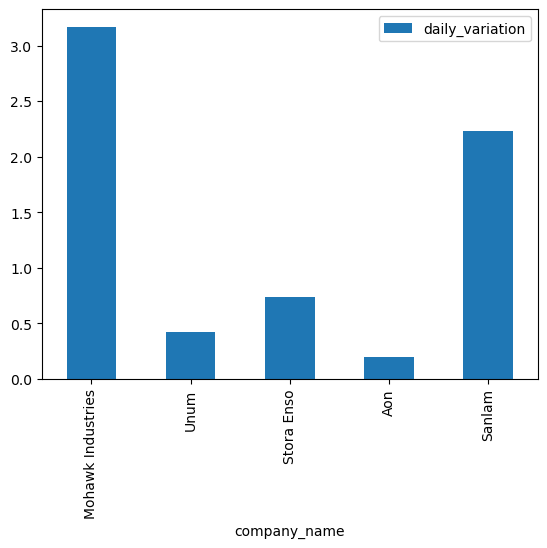

In [74]:
df.sample(5).plot.bar(x="company_name", y="daily_variation", rot=90)